In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# HVAC Energy Consumption and Cost Analysis

## Indroduction
HVAC or Heating Ventilation Air Conditioning systems are a major contributor to power consumption in European countries. A great opportunity arises for energy savings, due to many HVAC systems being not properly maintained nor optimized. Such systems are important for maintaining proper IAQ (indoor air quality) in the human occupied rooms in the building. Optimal control of HVAC can lead to significant resources spent reduction.

### What is HVAC System
A Heating Ventilation and Air Conditioning (or HVAC) system is a group of components working on maintaining desired air conditions indoors.
Typical main HVAC components are:

1. Heating part<br>
    1.1 Boiler for heating up water or steam in the system. Boilers are typically fuelled with electricity or natural gas.<br>
    1.2 Furnace for heating up air. Natural gas or electricity are main fuelling options.<br>
    1.3 Electrical Heating Coils for heating air.<br>
2. Ventilation part<br>
    2.1 MUA (Make-up air) exhaust systems like kitchen hoods, bathroom ventilation.<br>
    2.2 Air pressure controlling systems.<br>
3. Air Conditioning part<br>
    3.1 Chilled water and refrigeration systems for removing heat from the air.<br>
    3.2 Air temperature control systems.<br>
    3.3 Humidity control systems.<br>
    3.4 Air filtering systems.<br>
    3.5 Air velocity, volume, and direction of airflow controls.<br>
    3.5 Outside systems for processing incoming outdoors air such as: supply and return air ducts, fans, air inlets and outlets.<br>
    
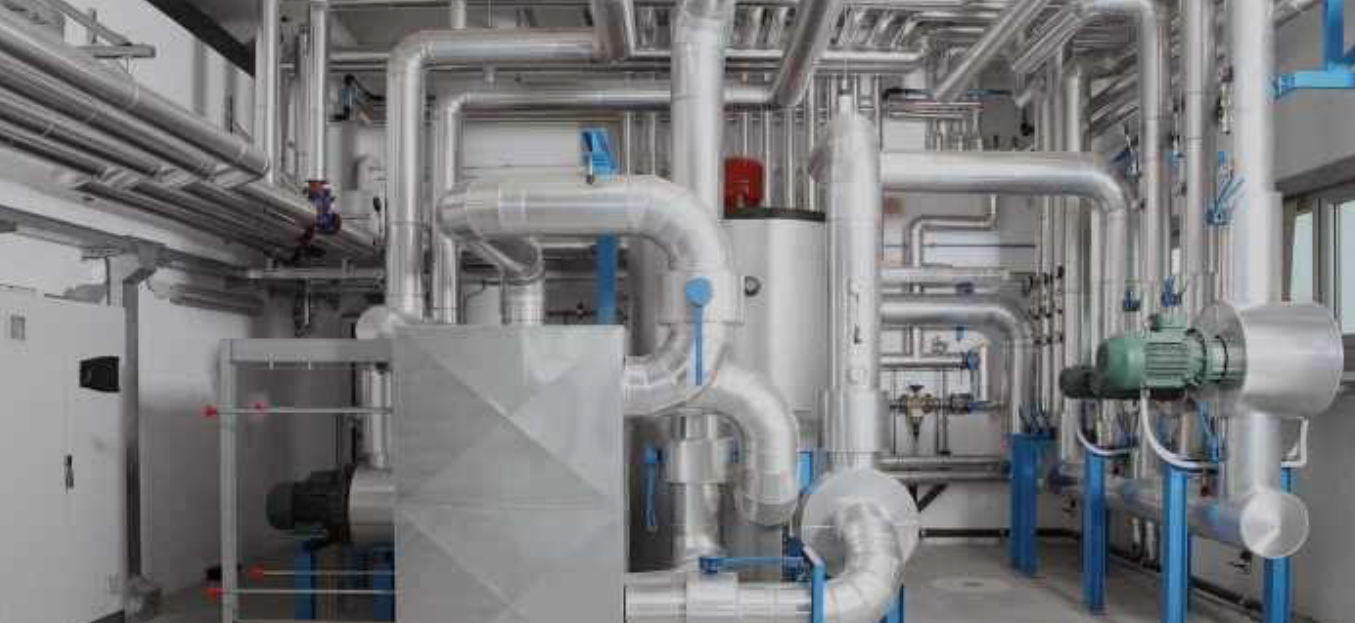

Figure 1. Inside looks of the HVAC system.

### HVAC System Operation

Before the HVAC system starts working first it is important to figure out ventilation and IAQ requirements, depending on the size and specification of the ventilated area. Main goal is to cycle enough air to prevent explicit carbon dioxide making air “stale” and unbreathable. Carbon Dioxide is usually removed by replacing inside air with “fresh” outdoors air. Another import factor is to maintain proper positive pressurization of the environment. The usual process inside AHU (air handling unit) goes as follows, RE (return air, from the rooms to the system) goes into a mixed air-chamber, known as plenum. Then the RE is combined with OA (outside air, coming from outside air dampers) inside the plenum. The amount of OA depends on total volume of SA (supply air, going back to the rooms from the system) and should be 20% of SA, with this situation RE will comprise 80% of MA (mixed air in plenum) for a total of 100% MA. Then air leaves plenum and proceeds further into a coil section. Any air EA (exhaust air, brought to the system) is excluded from the process through exhaust air dampers. The amount of heating is usually decided by indoor design features (such as, quality of insulation, number of doors and windows, area of the roof etc.) and outdoors weather conditions. For example, after leaving the coil section air carries X Wh of heat. It is blown by a supply air fan into an insulated supply air duct and through supply air outlets into the conditioned room. There, air gives up X Wh of heat to the environment, to replace X Wh of heat that left the room through walls, windows, doors ceiling, roof etc. After that air goes to RA inlets of AHU and the process is repeated. Similar logic applies for cooling, but air is cooled. In case of cooling, air is heated inside conditioned space by humans, electric appliances, and other heat sources.

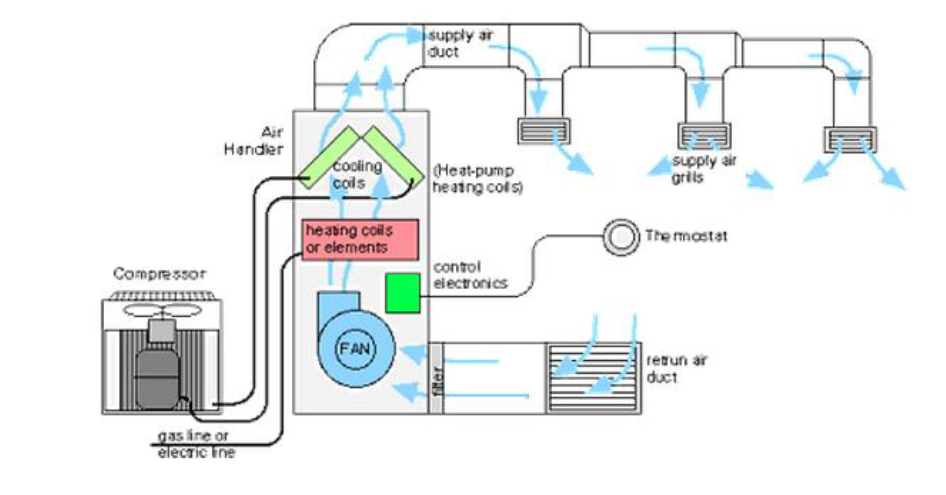

Figure 2. Schematics of HVAC system process.

### HVAC System Control

There are three main types of HVAC control systems: pneumatic, electric, and electronic - Direct Digital Control (DDC, for short). DDC is the automated control of the process by a digital computer. A DDC control’s loop main component is a microprocessor. Microprocessor’s output is converted to pressure signals, to control cooling and heating valves of the system. DDC allows for better control of water temperature, supply air temperature and parameters of the ventilation system. A combination of software and hardware solutions is used for maintaining specific variables in the desired condition. For example, logic on how indoors temperature should be conditioned, based on outdoors temperature can be assigned to a microprocessor. Logic of the DDC control system can be modified on the software level. This allows for the development of mathematical control algorithms. With smart control logic it allows for improved energy management and demand-based cooling and heating control.

### Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling. EDA can be described by four main characteristics:


1. Emphasis on understanding data. Trying to answer the broad question of “what is going on?” data.
2. Emphasis on graphical representation of the data.
3. Emphasis on hypothesis generation from data.
4. Skepticism and flexibility, when choosing which methods to apply.

Techniques used in EDA is usually a set of graphical and statistical methods. Box plots, histograms, scatter plots etc. are used to explore dataset’s characteristics. Data linearity, seasonality, trend, autocorrelation, distribution of the data are among insights sought out while performing EDA.

### About the Datasets
The first [dataset](https://www.kaggle.com/datasets/mrsimple07/energy-consumption-prediction) for this project is taken from [Kaggle](https://www.kaggle.com/) and it is synthethic, means is simulated. This dataset encapsulates a diverse array of features, including temperature, humidity, occupancy, HVAC and lighting usage, renewable energy contributions, and more. Each timestamp provides a snapshot of a hypothetical environment, allowing for in-depth analysis and modeling of energy consumption behaviors. Dive into the nuances of this synthetic dataset, designed to emulate real-world scenarios, and unravel the complexities that influence energy usage. Whether you are delving into predictive modeling or honing your data analysis skills, this dataset offers a dynamic playground for experimentation and discovery. The way of gathering real data is through sensors integrated into BAS (building automation system) and stored into a SQL database. 

The second [dataset](https://ember-climate.org/data-catalogue/european-wholesale-electricity-price-data/) contains average hourly, daily and monthly wholesale day-ahead electricity prices for European countries. 

The merged dataset will encapsulates a diverse array of features, temperaturs, humidity, occupancy, HVAC and lighting usage, renewable energy contributions, price of the energy in EUR and more. Each timestamp provides a snapshot of a hypothetical environment, allowing for in-depth analysis and modeling of energy consumption behaviors. The prices are real and I will make an assumption that this hypotetical HVAC system is situaited in Bulgaria, so I will use the data for Bulgrarian energy prices.

### Goal of the Project
Through Exploratory Data Analysis (EDA), we will visualize the distribution of variables, examine the relationships between features and energy consumption, and identify the proportion of total energy consumption that comes from renewable sources. We will also explore patterns related to categorical variables such as lighting status and HVAC system operation. Finally, I will conduct a cost analysis. These insights will inform the development of predictive models for accurately forecasting energy consumption in the subsequent project.


## Reading, tidying and exploring the dataset

First, I will read our dataset using the following code: ```pd.read_csv("Energy_consumption.csv")```. The dataset will be stored in a variable named ```hvac_data``` .

In [2]:
hvac_data = pd.read_csv("Energy_consumption.csv")

Then I will check the shape of the dataset. This will give an insight of how much rows (obsevation) and columns (features) are in there. 

In [3]:
hvac_data.shape

(1000, 11)

After that I will check the columns names.

In [4]:
hvac_data.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

I will standardize the column names to be more Pythonic by converting them to lowercase and using underscores for separation, without manual adjustments.

In [5]:
def format_dataframe_columns(df):
    def format_column_name(name):
        # This regex looks for:
        # 1. A lowercase letter followed by an uppercase letter
        # 2. A digit followed by an uppercase letter
        # The goal is to insert an underscore only in these cases, but not between consecutive uppercase letters.
        formatted_name = re.sub(r'(?<=[a-z0-9])(?=[A-Z])', '_', name)
        # Convert the entire string to lowercase after handling underscores
        formatted_name = formatted_name.lower()
        return formatted_name
    
    # Apply the formatting function to each column name
    formatted_columns = {
        col: format_column_name(col)
        for col in df.columns
    }
    
    # Rename the columns in the dataframe
    df.rename(columns=formatted_columns, inplace=True)
    return df


In [6]:
hvac_data = format_dataframe_columns(hvac_data)

In [7]:
hvac_data.columns

Index(['timestamp', 'temperature', 'humidity', 'square_footage', 'occupancy',
       'hvacusage', 'lighting_usage', 'renewable_energy', 'day_of_week',
       'holiday', 'energy_consumption'],
      dtype='object')

However, the column name ```hvacusage``` doesn't fit well with this format, so I will modify it manually.

In [8]:
hvac_data = hvac_data.rename(columns={'hvacusage':'hvac_usage'})

Next, I will convert the ```timestamp``` column to a ```datetime``` type.

In [9]:
hvac_data.timestamp = pd.to_datetime(hvac_data.timestamp)

In [10]:
hvac_data.dtypes

timestamp             datetime64[ns]
temperature                  float64
humidity                     float64
square_footage               float64
occupancy                      int64
hvac_usage                    object
lighting_usage                object
renewable_energy             float64
day_of_week                   object
holiday                       object
energy_consumption           float64
dtype: object

In [11]:
hvac_data

,timestamp,temperature,humidity,square_footage,occupancy,hvac_usage,lighting_usage,renewable_energy,day_of_week,holiday,energy_consumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


Since this datasets is syntetic, means is simulated, there is no reson to have a missing values. But let's check that.

In [12]:
hvac_data.isnull().sum()

timestamp             0
temperature           0
humidity              0
square_footage        0
occupancy             0
hvac_usage            0
lighting_usage        0
renewable_energy      0
day_of_week           0
holiday               0
energy_consumption    0
dtype: int64

There seems to be an issue with the ```square_footage``` column. The values are in square feet, and I want to convert them to square meters using the appropriate conversion formula:

$$ 1  \:Square foot = 0.092903  \: square meter $$
$$ Square meter = Square foot . 0.092903 $$

In [13]:
hvac_data['square_footage'] = hvac_data['square_footage'] * 0.092903

The column now looks better. I will rename the column ```square_footage``` to ```square_meters``` 

In [14]:
hvac_data = hvac_data.rename(columns={"square_footage":"square_meters"})

The ```renewable_energy``` column represents percentages, so I will format the values to two decimal places.

In [15]:
hvac_data = hvac_data.round({"renewable_energy":2})

I want to add a new column that represents the portion of the total energy consumption that comes from renewable energy, measured in MWh. For clarity, I will rename the  ```renewable_energy``` column to ```renewable_energy_pct``` since the values are percentages.

In [16]:
hvac_data = hvac_data.rename(columns={"renewable_energy":"renewable_energy_pct"})

I will then perform some calculations by multiplying the ```energy_consumption``` by the ```renewable_energy_pct``` and dividing the result by 100.

In [17]:
hvac_data['renewable_energy'] = (hvac_data['energy_consumption'] * hvac_data['renewable_energy_pct']) / 100

For a final touch, I will rearrange the columns so that the order starts with year, month, day, and hour.

In [18]:
hvac_data= hvac_data[["timestamp","temperature", "humidity","energy_consumption", "renewable_energy", "renewable_energy_pct", "square_meters", "occupancy", 
                "hvac_usage", "lighting_usage","day_of_week", "holiday",]]

In [19]:
hvac_data

,timestamp,temperature,humidity,energy_consumption,renewable_energy,renewable_energy_pct,square_meters,occupancy,hvac_usage,lighting_usage,day_of_week,holiday
0,2022-01-01 00:00:00,25.139433,43.431581,75.364373,2.087593,2.77,145.457670,5,On,Off,Monday,No
1,2022-01-01 01:00:00,27.731651,54.225919,83.401855,18.206625,21.83,131.092164,1,On,On,Saturday,No
2,2022-01-01 02:00:00,28.704277,58.907658,78.270888,5.291112,6.76,163.111192,2,Off,Off,Sunday,No
3,2022-01-01 03:00:00,20.080469,50.371637,56.519850,4.872011,8.62,134.924543,1,Off,On,Wednesday,No
4,2022-01-01 04:00:00,23.097359,51.401421,70.811732,2.173920,3.07,101.647993,9,On,Off,Friday,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,82.306692,17.440788,21.19,100.343323,5,Off,Off,Saturday,No
996,2022-02-11 12:00:00,23.836647,47.256435,66.577320,17.143660,25.75,158.421462,4,Off,On,Tuesday,Yes
997,2022-02-11 13:00:00,23.005340,48.720501,72.753471,0.218260,0.30,122.658463,6,Off,On,Friday,Yes
998,2022-02-11 14:00:00,25.138365,31.306459,76.950389,15.720965,20.43,121.617433,3,On,Off,Thursday,Yes


Lets check for the last time the datatypes of the dataframe

In [20]:
hvac_data.dtypes

timestamp               datetime64[ns]
temperature                    float64
humidity                       float64
energy_consumption             float64
renewable_energy               float64
renewable_energy_pct           float64
square_meters                  float64
occupancy                        int64
hvac_usage                      object
lighting_usage                  object
day_of_week                     object
holiday                         object
dtype: object

I noticed that the ```occupancy``` column is currently of type ```int64```. I will convert it to ```int```. Additionally, I will convert all object-type variables to categorical variables for memory efficiency. Since there are four object-type variables, I will use a for loop to avoid manual conversion.

In [21]:
for column in hvac_data.columns:
    if hvac_data[column].dtype == 'object':
        hvac_data[column] = hvac_data[column].astype("category")

In [22]:
hvac_data.occupancy = hvac_data.occupancy.astype(int)

In [23]:
hvac_data.dtypes

timestamp               datetime64[ns]
temperature                    float64
humidity                       float64
energy_consumption             float64
renewable_energy               float64
renewable_energy_pct           float64
square_meters                  float64
occupancy                        int32
hvac_usage                    category
lighting_usage                category
day_of_week                   category
holiday                       category
dtype: object

The dataframe now appears to be ready for analysis.

Next, I will examine the descriptive statistics of the dataframe using the ```.describe()``` method.

In [24]:
hvac_data.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,1000,2022-01-21 19:29:59.999999744,2022-01-01 00:00:00,2022-01-11 09:45:00,2022-01-21 19:30:00,2022-02-01 05:15:00,2022-02-11 15:00:00,NaN
temperature,1000.0,24.982026,20.007565,22.64507,24.751637,27.418174,29.998671,2.83685
humidity,1000.0,45.395412,30.015975,38.297722,45.972116,52.420066,59.969085,8.518905
energy_consumption,1000.0,77.055873,53.263278,71.54469,76.943696,82.921742,99.20112,8.144112
renewable_energy,1000.0,11.718514,0.00803,5.824026,11.643226,17.510986,28.520899,6.990609
renewable_energy_pct,1000.0,15.13288,0.01,7.6275,15.075,22.8825,29.97,8.745815
square_meters,1000.0,139.359376,92.950628,115.860125,140.094698,161.682822,185.804351,26.794979
occupancy,1000.0,4.581,0.0,2.0,5.0,7.0,9.0,2.865598


Upon reviewing the statistics, I do not see any values that appear to be out of the ordinary.

Finally, I will save the dataframe under a new name.

In [25]:
hvac_data_tidy = hvac_data



### Visualization
To gain insights into energy consumption, I will create several plots to:

1. Visualize the energy consumption trends over time.
2. Identify which variables correlate with energy consumption.
3. Explore other significant energy-consuming factors.
4. Assess the proportion of total energy consumption over the entire period that comes from renewable energy sources.
5. Conduct a cost analysis to understand the financial implications of energy consumption, comparing costs between renewable and non-renewable sources.

These visualizations and analyses will provide a comprehensive understanding of the energy usage patterns, the impact of various factors on consumption, and the cost-effectiveness of renewable energy.

#### Energy consumption over time (every month and hour)

First I will check the energy consumption over time. I will check what is the energy consumption for every hour and every day.

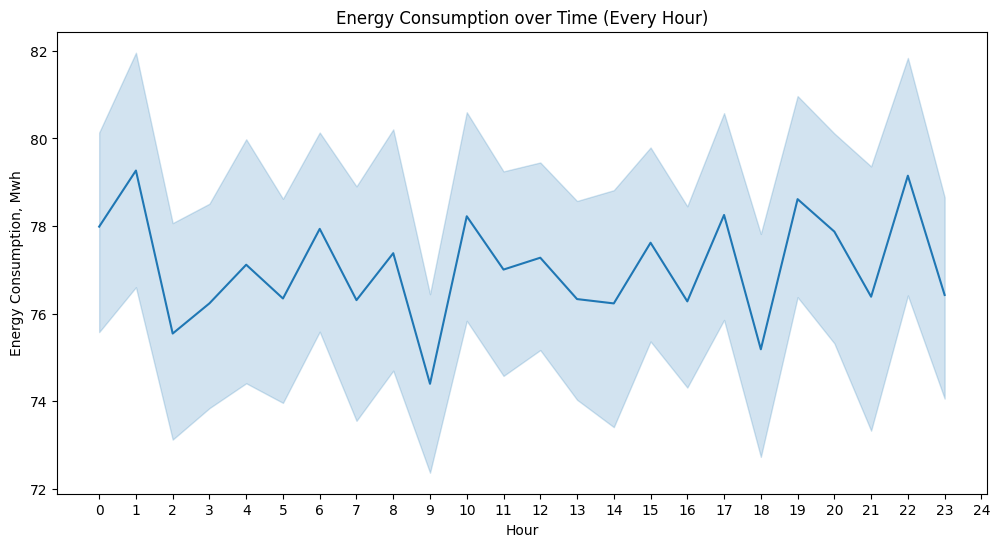

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hvac_data['timestamp'].dt.hour, y='energy_consumption', data=hvac_data_tidy)

plt.xticks(range(0, 25))
plt.title('Energy Consumption over Time (Every Hour)')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption, Mwh')
plt.show()


This line plot visualizes the energy consumption of the HVAC system over the course of a 24-hour period. Each point on the plot represents the average energy consumption (in MWh) at a specific hour of the day, aggregated across the entire dataset. The energy consumption fluctuates throughout the day, with certain hours showing higher or lower consumption wich is a sign of a synthetic dataset. 

__Key Observations:__

* Fluctuations: The energy consumption fluctuates throughout the day, with certain hours showing higher or lower consumption.
* Peak and Off-Peak Periods: There are observable peaks where energy consumption is higher, which might correlate with periods of increased HVAC usage, such as early morning or late evening. Conversely, lower consumption might indicate periods of reduced activity or energy-saving measures.

__In Reality:__ 

In a real-world scenario, hourly energy consumption might be influenced by various factors such as weather conditions, occupancy levels, and operational schedules. Peaks would likely correspond to hours of higher activity or extreme temperatures, while troughs would occur during periods of low occupancy or milder weather. In real world, one might expect to see a more pronounced difference between peak and off-peak hours, especially in commercial buildings where energy demand is closely tied to business hours.

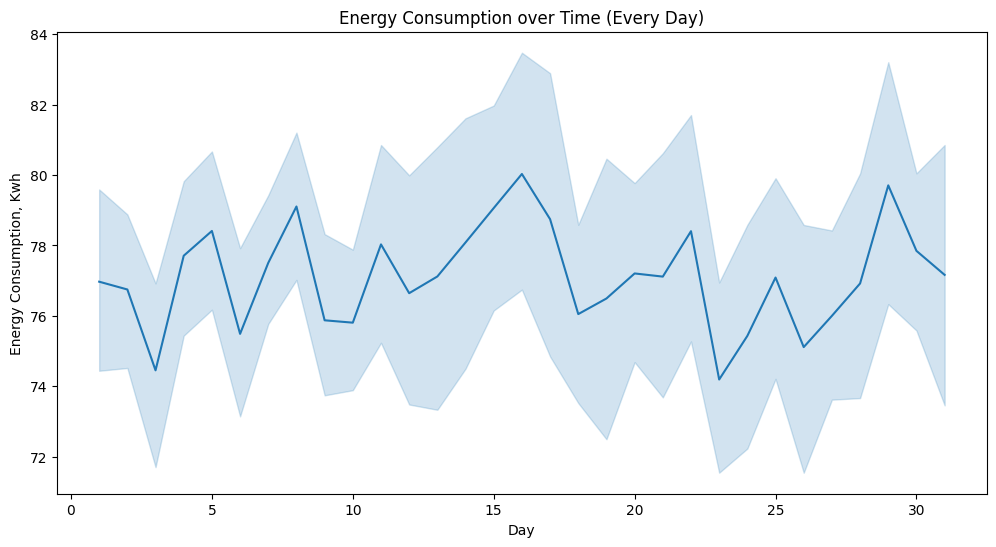

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hvac_data['timestamp'].dt.day, y='energy_consumption', data=hvac_data_tidy)


plt.title('Energy Consumption over Time (Every Day)')
plt.xlabel('Day')
plt.ylabel('Energy Consumption, Kwh')
plt.show()


This line plot displays the daily energy consumption of the HVAC system over the course of a month. Each point on the plot represents the average energy consumption (in KWh) for each day, based on the synthetic dataset. The plot indicates that there is significant variability in daily energy consumption, which is again a sign of synthetic dataset.

__Key Observations:__

*Variability in Consumption: The plot indicates that there is significant variability in daily energy consumption. The wide range in the shaded area suggests that some days experience much higher or lower consumption than the average.
* Trends and Peaks: There are noticeable peaks around days 15 and 25, which might indicate periods of higher demand. The troughs around days 7 and 20 suggest lower usage during these times.
* Potential Influences: The variation in consumption could be influenced by several factors such as weather changes, occupancy levels, or operational schedules. Investigating these factors could provide insights into why certain days have higher or lower energy usage.

__In Reality:__ 

Daily energy consumption in a real-world setting would likely show more consistent patterns related to external temperatures, occupancy rates, and operational needs. For example, energy consumption might be higher during weekdays and lower on weekends, especially in commercial environments.

#### Correlation Matrix

Let's check how different values correlate between each other. For this purpose I will plot a correlation matrix.

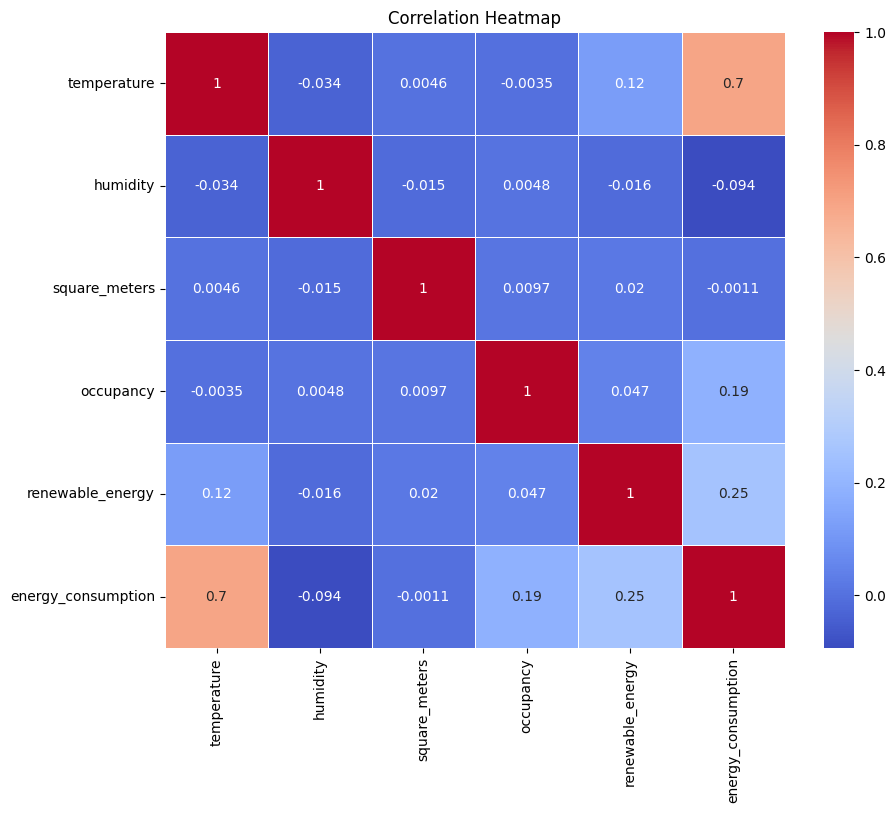

In [28]:
plt.figure(figsize=(10, 8))
corr = (hvac_data_tidy[['temperature', 'humidity', 'square_meters', 'occupancy', 'renewable_energy', 'energy_consumption']]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

This heatmap visualizes the correlation between various features in the dataset, including temperature, humidity, square meters, occupancy, renewable energy, and energy consumption. Correlation measures the strength and direction of a linear relationship between two variables, with values ranging from -1 to 1. A positive correlation indicates that as one variable increases, the other tends to increase, while a negative correlation indicates an inverse relationship. Interesting. Only the temperature has a very good corelation with the energy consumption. At the beggining I was assuming that also the area of the room also would have a good correlation with the energy consumption. This is also a sign of synthetic dataset.

__Key Observations:__

* Temperature vs. Energy Consumption: The strongest positive correlation (0.7) is observed between temperature and energy consumption. This suggests that as temperature increases, energy consumption also tends to increase, likely due to the increased demand for cooling.
* Renewable Energy vs. Energy Consumption: There is a moderate positive correlation (0.25) between renewable energy and energy consumption, indicating that higher usage of renewable energy sources coincides with higher overall energy consumption. This could be due to the deployment of renewable energy during peak demand periods.
* Occupancy vs. Energy Consumption: Occupancy shows a weak positive correlation (0.19) with energy consumption, suggesting that higher occupancy may slightly increase energy usage, possibly due to the need for maintaining comfortable indoor environments.
* Humidity: Humidity has a weak negative correlation (-0.094) with energy consumption, indicating that higher humidity might slightly reduce energy usage, although the relationship is not strong.

__In Reality:__ 

In actual HVAC systems, the correlation between temperature and energy consumption would likely be strong, as seen in the simulation, due to the direct impact of temperature on heating and cooling needs. However, the exact correlation values could vary based on factors such as building insulation, HVAC system efficiency, and external temperature fluctuations.

Renewable Energy: In a real-world scenario, the correlation between renewable energy and total energy consumption might be influenced by how much renewable energy is integrated into the grid. A higher reliance on renewables could reduce overall energy costs, particularly during peak demand periods.

Occupancy and Other Factors: Real-world data might show stronger correlations between occupancy and energy consumption, especially in buildings with variable occupancy rates, such as offices or schools.

Now I will plot the correlation between temperature and energy consumption in a scatter plot.

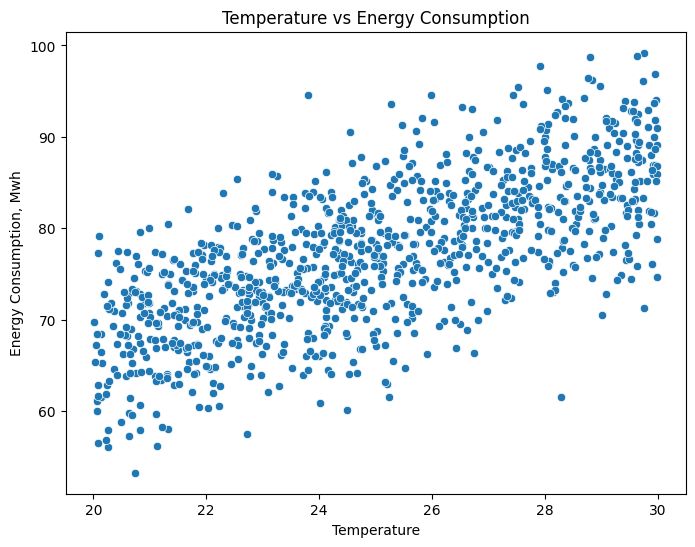

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='energy_consumption', data=hvac_data_tidy)
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption, Mwh')
plt.show()

The scatter plot reveals a trend where energy consumption increases with rising temperatures, consistent with the positive correlation value of 0.7 observed in the correlation heatmap. This suggests that higher temperatures typically lead to greater energy demand as the HVAC system works harder to cool the indoor environment.


__Interpretation:__

* Positive Correlation: The scatter plot reveals a trend where energy consumption increases with rising temperatures, consistent with the positive correlation value of 0.7 observed in the correlation heatmap. This suggests that higher temperatures typically lead to greater energy demand as the HVAC system works harder to cool the indoor environment.
* Data Spread: The spread of points indicates some variability in energy consumption at similar temperature levels, which could represent differences in other factors like occupancy, building insulation, or the presence of renewable energy sources.

__In Reality:__ 

In real-world scenarios, you would expect to see a similar positive trend, where energy consumption rises with temperature. However, the spread might be influenced by additional real-world factors:

* HVAC Efficiency: Buildings with more efficient HVAC systems may show less of an increase in energy consumption for the same rise in temperature.
* External Conditions: Variations in humidity, solar radiation, and other external factors could cause more scatter in the data points.
* Building Insulation: Better-insulated buildings might show a weaker dependence of energy consumption on temperature.

#### Energy Consumption by Lighting Usage

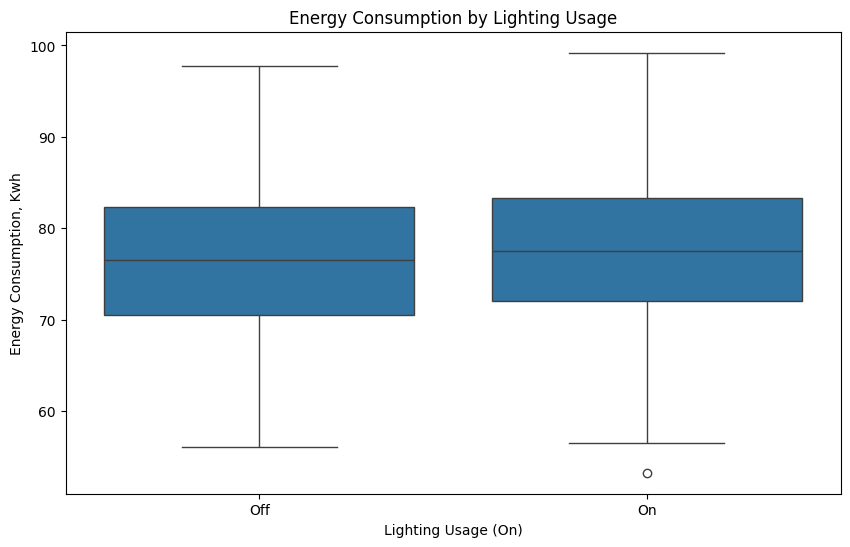

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='lighting_usage', y='energy_consumption', data=hvac_data_tidy)
plt.title('Energy Consumption by Lighting Usage')
plt.xlabel('Lighting Usage (On)')
plt.ylabel('Energy Consumption, Kwh')
plt.show()

This box plot visualizes the distribution of energy consumption based on whether the lighting in the building is on or off. The plot reveals how energy consumption varies when the lighting is on. A higher box or whiskers may suggest that energy consumption is higher when lighting is in use, reflecting additional load on the HVAC system due to lighting needs.

__Interpretation:__

* Box Plot Elements: The box plot shows the median, quartiles, and potential outliers in energy consumption when the lighting is on (lighting_usage).
Median: The line inside the box represents the median energy consumption when the lighting is on.
* Interquartile Range (IQR): The box itself covers the middle 50% of the data (from the 25th to the 75th percentile).
Whiskers: The lines extending from the box indicate the range within which most of the data points fall. Data points beyond the whiskers are considered outliers.

__In Reality:__ 

In actual HVAC systems, lighting can significantly impact overall energy consumption. For instance:
* Increased Load: When lighting is on, it can add to the heat load, requiring more cooling and thereby increasing energy consumption.
* Building Design: The impact of lighting on energy usage also depends on factors such as building design, the efficiency of lighting systems, and occupancy patterns.


__Optimization Opportunity:__

In real-world scenarios, optimizing lighting usage (e.g., through the use of energy-efficient lighting or smart lighting systems that adjust based on occupancy) could lead to significant reductions in energy consumption.

#### Energy Distribution

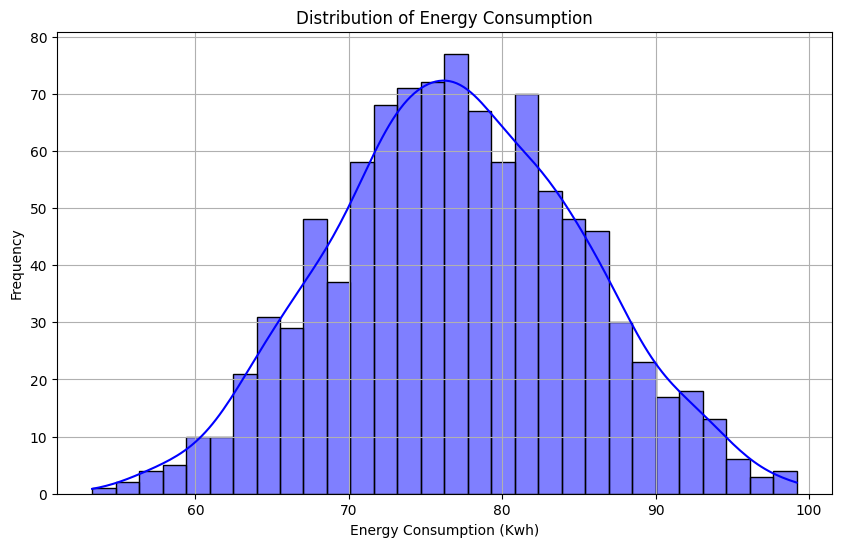

In [31]:
plt.figure(figsize=(10, 6))

sns.histplot(hvac_data_tidy['energy_consumption'], kde=True, bins=30, color='blue')


plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (Kwh)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

This histogram displays the distribution of energy consumption in the simulated HVAC system data. The overlayed Kernel Density Estimate (KDE) curve provides a smooth estimate of the data's probability density, showing that the data follows a normal (Gaussian) distribution.

__Interpretation:__

* Normal Distribution: The bell-shaped curve indicates that the energy consumption data is normally distributed. This means most of the energy consumption values are clustered around the mean, with fewer occurrences as we move further away from the center.
* Spread and Skewness: The data shows a symmetrical spread around the mean, which is typical of a normal distribution. There is little to no skewness, indicating that high and low values of energy consumption are equally likely in this dataset.

__In Reality:__ 

In real-world scenarios, energy consumption data might not always follow a perfect normal distribution. Variations could occur due to:

* Seasonal Effects: Energy consumption could be higher during certain seasons, leading to a skewed distribution.
* Operational Patterns: Changes in occupancy patterns, such as more people using the facility during the day, might cause deviations from normality.
* External Influences: Factors like unexpected weather changes or maintenance activities can introduce variability, leading to a distribution that may be skewed or have multiple peaks.

#### Total Energy Consumption vs Total Renewable Energy Consumption

Now I will plot the what is the total consumption of energy and what is the total of renewable energy.

In [32]:
energy = hvac_data_tidy.energy_consumption.sum()

In [33]:
renewable_energy = hvac_data_tidy.renewable_energy.sum()

In [34]:
total_renewable_energy_pct = renewable_energy/energy*100

In [35]:
total_renewable_energy_pct

15.207814653438556

The renewable energy is only 15% from the total energy consumption.

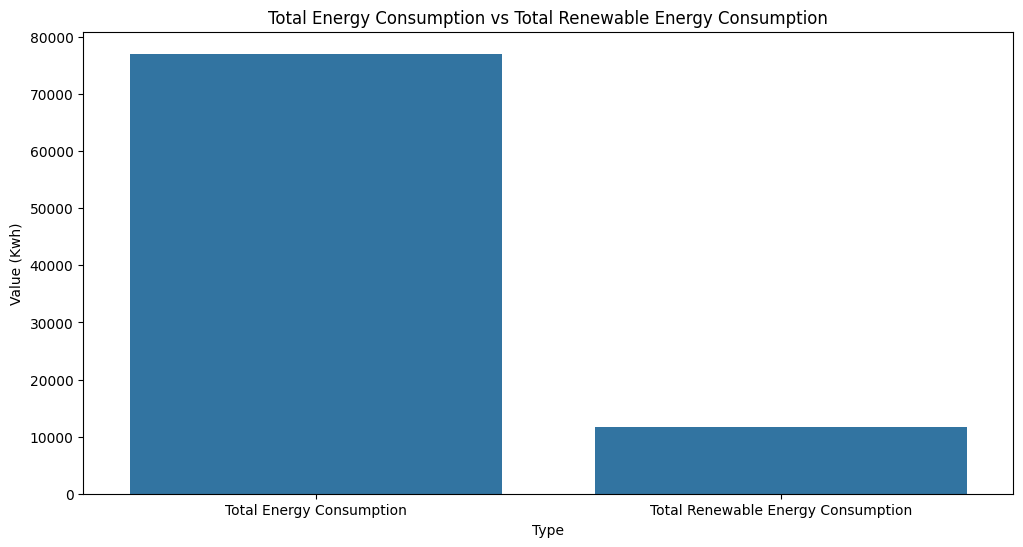

In [36]:
data = {
    'Type': ['Total Energy Consumption', 'Total Renewable Energy Consumption'],
    'Value': [energy , renewable_energy]
}
plot_data = pd.DataFrame(data)

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Value', data=plot_data)
plt.title('Total Energy Consumption vs Total Renewable Energy Consumption')
plt.xlabel('Type')
plt.ylabel('Value (Kwh)')
plt.show()

This bar plot compares the total energy consumption with the total renewable energy consumption.

__Interpretation:__

* Total Energy Consumption: The first bar represents the total energy consumed over the entire period covered by the dataset. This value is relatively high, as it encompasses all energy sources used by the system.
* Total Renewable Energy Consumption: The second bar represents the total amount of energy derived from renewable sources during the same period. In comparison to the total energy consumption, the renewable energy contribution is significantly lower.


__In Reality:__

In a real-world scenario, the proportion of renewable energy consumption could vary significantly depending on the region, availability of renewable resources, and investment in renewable technologies. If more renewable energy sources were utilized, the proportion of renewable energy could increase, leading to a potential reduction in overall energy costs and environmental impact.

__Conclusion:__

The total difference between total energy consumption and renewable energy consumption highlights an opportunity for enhancing sustainability by increasing the use of renewable energy. In real-world applications, investing in renewable energy infrastructure or optimizing energy management strategies to prioritize renewable sources could help close this gap. This could lead to cost savings, reduction in carbon emissions, and a more sustainable operation overall.



#### Cost Analysis

Now, let's determine the cost of this hypothetical energy consumption by examining our second dataset.

First, I will read the second dataset.

In [37]:
energy_price_bg = pd.read_csv("Bulgaria.csv")

As before, I will clean and tidy this dataset to ensure consistency and accuracy.

In [38]:
energy_price_bg.columns = energy_price_bg.columns.str.lower()

In [39]:
energy_price_bg.columns = energy_price_bg.columns.str.replace(" ", "_")

In [40]:
energy_price_bg = energy_price_bg.rename(columns={
    "datetime_(utc)":"datetime_utc",
    "datetime_(local)":"timestamp", # timestamp because of the inner join later.
    "price_(eur/mwhe)":"price_eur_mwh"
                                 })

In [41]:
energy_price_bg

,country,iso3_code,datetime_utc,timestamp,price_eur_mwh
0,Bulgaria,BGR,2016-10-01 00:00:00,2016-10-01 03:00:00,69.49
1,Bulgaria,BGR,2016-10-01 01:00:00,2016-10-01 04:00:00,69.49
2,Bulgaria,BGR,2016-10-01 02:00:00,2016-10-01 05:00:00,69.49
3,Bulgaria,BGR,2016-10-01 03:00:00,2016-10-01 06:00:00,69.49
4,Bulgaria,BGR,2016-10-01 04:00:00,2016-10-01 07:00:00,69.49
...,...,...,...,...,...
68659,Bulgaria,BGR,2024-07-31 19:00:00,2024-07-31 22:00:00,214.92
68660,Bulgaria,BGR,2024-07-31 20:00:00,2024-07-31 23:00:00,142.80
68661,Bulgaria,BGR,2024-07-31 21:00:00,2024-08-01 00:00:00,103.08
68662,Bulgaria,BGR,2024-07-31 22:00:00,2024-08-01 01:00:00,108.05


In [42]:
energy_price_bg.isnull().values.any()

False

There are no missing values in this dataset.

In [43]:
hvac_data_tidy.columns

Index(['timestamp', 'temperature', 'humidity', 'energy_consumption',
       'renewable_energy', 'renewable_energy_pct', 'square_meters',
       'occupancy', 'hvac_usage', 'lighting_usage', 'day_of_week', 'holiday'],
      dtype='object')

In [44]:
energy_price_bg.columns

Index(['country', 'iso3_code', 'datetime_utc', 'timestamp', 'price_eur_mwh'], dtype='object')

Since both dataframes contain a  ```timestamp``` column, we will use this as the ```key``` for joining the datasets. But first, let's convert it to a ```datetime``` format.

In [45]:
energy_price_bg.timestamp = pd.to_datetime(energy_price_bg.timestamp)

In [46]:
energy_price_bg.dtypes

country                  object
iso3_code                object
datetime_utc             object
timestamp        datetime64[ns]
price_eur_mwh           float64
dtype: object

Now I am ready to make a ```inner join```. Inner join in pandas is used to merge two data frames at the intersection. It returns the mutual rows of both.

In [47]:
merged_data = pd.merge(hvac_data, energy_price_bg, on='timestamp', how='inner')

In [48]:
merged_data.head()

,timestamp,temperature,humidity,energy_consumption,renewable_energy,renewable_energy_pct,square_meters,occupancy,hvac_usage,lighting_usage,day_of_week,holiday,country,iso3_code,datetime_utc,price_eur_mwh
0,2022-01-01 00:00:00,25.139433,43.431581,75.364373,2.087593,2.77,145.457670,5,On,Off,Monday,No,Bulgaria,BGR,2021-12-31 22:00:00,57.98
1,2022-01-01 01:00:00,27.731651,54.225919,83.401855,18.206625,21.83,131.092164,1,On,On,Saturday,No,Bulgaria,BGR,2021-12-31 23:00:00,61.84
2,2022-01-01 02:00:00,28.704277,58.907658,78.270888,5.291112,6.76,163.111192,2,Off,Off,Sunday,No,Bulgaria,BGR,2022-01-01 00:00:00,41.33
3,2022-01-01 03:00:00,20.080469,50.371637,56.519850,4.872011,8.62,134.924543,1,Off,On,Wednesday,No,Bulgaria,BGR,2022-01-01 01:00:00,43.09
4,2022-01-01 04:00:00,23.097359,51.401421,70.811732,2.173920,3.07,101.647993,9,On,Off,Friday,No,Bulgaria,BGR,2022-01-01 02:00:00,45.46


We now have a new dataframe containing electricity prices for a specific period. I want to incorporate this data into my main dataframe, ```hvac_data_tidy```. To do so, I will extract the ```temperature```  and ```price_eur_mwh``` features from the ```merged``` dataframe and perform an inner join.

In [49]:
price = merged_data[["temperature","price_eur_mwh"]]

In [50]:
hvac_data_tidy = hvac_data_tidy.merge(price, on='temperature', how='inner')

In [51]:
hvac_data_tidy

,timestamp,temperature,humidity,energy_consumption,renewable_energy,renewable_energy_pct,square_meters,occupancy,hvac_usage,lighting_usage,day_of_week,holiday,price_eur_mwh
0,2022-01-01 00:00:00,25.139433,43.431581,75.364373,2.087593,2.77,145.457670,5,On,Off,Monday,No,57.98
1,2022-01-01 01:00:00,27.731651,54.225919,83.401855,18.206625,21.83,131.092164,1,On,On,Saturday,No,61.84
2,2022-01-01 02:00:00,28.704277,58.907658,78.270888,5.291112,6.76,163.111192,2,Off,Off,Sunday,No,41.33
3,2022-01-01 03:00:00,20.080469,50.371637,56.519850,4.872011,8.62,134.924543,1,Off,On,Wednesday,No,43.09
4,2022-01-01 04:00:00,23.097359,51.401421,70.811732,2.173920,3.07,101.647993,9,On,Off,Friday,No,45.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,82.306692,17.440788,21.19,100.343323,5,Off,Off,Saturday,No,185.28
996,2022-02-11 12:00:00,23.836647,47.256435,66.577320,17.143660,25.75,158.421462,4,Off,On,Tuesday,Yes,173.12
997,2022-02-11 13:00:00,23.005340,48.720501,72.753471,0.218260,0.30,122.658463,6,Off,On,Friday,Yes,162.28
998,2022-02-11 14:00:00,25.138365,31.306459,76.950389,15.720965,20.43,121.617433,3,On,Off,Thursday,Yes,161.68


The main dataframe now includes a new column for prices. Since energy consumption is measured in ```KWh``` and the price is per ```MWh```, I need to convert the energy consumption to ```MWh```.


In [52]:
hvac_data_tidy['consumption_mwh'] = hvac_data_tidy['energy_consumption'] / 1000

In [53]:
hvac_data_tidy

,timestamp,temperature,humidity,energy_consumption,renewable_energy,renewable_energy_pct,square_meters,occupancy,hvac_usage,lighting_usage,day_of_week,holiday,price_eur_mwh,consumption_mwh
0,2022-01-01 00:00:00,25.139433,43.431581,75.364373,2.087593,2.77,145.457670,5,On,Off,Monday,No,57.98,0.075364
1,2022-01-01 01:00:00,27.731651,54.225919,83.401855,18.206625,21.83,131.092164,1,On,On,Saturday,No,61.84,0.083402
2,2022-01-01 02:00:00,28.704277,58.907658,78.270888,5.291112,6.76,163.111192,2,Off,Off,Sunday,No,41.33,0.078271
3,2022-01-01 03:00:00,20.080469,50.371637,56.519850,4.872011,8.62,134.924543,1,Off,On,Wednesday,No,43.09,0.056520
4,2022-01-01 04:00:00,23.097359,51.401421,70.811732,2.173920,3.07,101.647993,9,On,Off,Friday,No,45.46,0.070812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,82.306692,17.440788,21.19,100.343323,5,Off,Off,Saturday,No,185.28,0.082307
996,2022-02-11 12:00:00,23.836647,47.256435,66.577320,17.143660,25.75,158.421462,4,Off,On,Tuesday,Yes,173.12,0.066577
997,2022-02-11 13:00:00,23.005340,48.720501,72.753471,0.218260,0.30,122.658463,6,Off,On,Friday,Yes,162.28,0.072753
998,2022-02-11 14:00:00,25.138365,31.306459,76.950389,15.720965,20.43,121.617433,3,On,Off,Thursday,Yes,161.68,0.076950


Now let's calculate the cost. I will do that by multiplying ```consumption_mwh``` by ```price_eur_mwh```.

In [54]:
hvac_data_tidy['total_cost_eur'] = hvac_data_tidy['consumption_mwh'] * hvac_data_tidy['price_eur_mwh']

In [55]:
hvac_data_tidy

,timestamp,temperature,humidity,energy_consumption,renewable_energy,renewable_energy_pct,square_meters,occupancy,hvac_usage,lighting_usage,day_of_week,holiday,price_eur_mwh,consumption_mwh,total_cost_eur
0,2022-01-01 00:00:00,25.139433,43.431581,75.364373,2.087593,2.77,145.457670,5,On,Off,Monday,No,57.98,0.075364,4.369626
1,2022-01-01 01:00:00,27.731651,54.225919,83.401855,18.206625,21.83,131.092164,1,On,On,Saturday,No,61.84,0.083402,5.157571
2,2022-01-01 02:00:00,28.704277,58.907658,78.270888,5.291112,6.76,163.111192,2,Off,Off,Sunday,No,41.33,0.078271,3.234936
3,2022-01-01 03:00:00,20.080469,50.371637,56.519850,4.872011,8.62,134.924543,1,Off,On,Wednesday,No,43.09,0.056520,2.435440
4,2022-01-01 04:00:00,23.097359,51.401421,70.811732,2.173920,3.07,101.647993,9,On,Off,Friday,No,45.46,0.070812,3.219101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,82.306692,17.440788,21.19,100.343323,5,Off,Off,Saturday,No,185.28,0.082307,15.249784
996,2022-02-11 12:00:00,23.836647,47.256435,66.577320,17.143660,25.75,158.421462,4,Off,On,Tuesday,Yes,173.12,0.066577,11.525866
997,2022-02-11 13:00:00,23.005340,48.720501,72.753471,0.218260,0.30,122.658463,6,Off,On,Friday,Yes,162.28,0.072753,11.806433
998,2022-02-11 14:00:00,25.138365,31.306459,76.950389,15.720965,20.43,121.617433,3,On,Off,Thursday,Yes,161.68,0.076950,12.441339


Next, let's analyze the cost distribution. I will start by generating descriptive statistics for the ```total_cost_eur```.

In [56]:
cost_summary = hvac_data_tidy['total_cost_eur'].describe()

In [57]:
cost_summary

count    1000.000000
mean       14.803903
std         5.888245
min         0.568797
25%        10.767623
50%        15.235413
75%        18.897659
max        35.012107
Name: total_cost_eur, dtype: float64

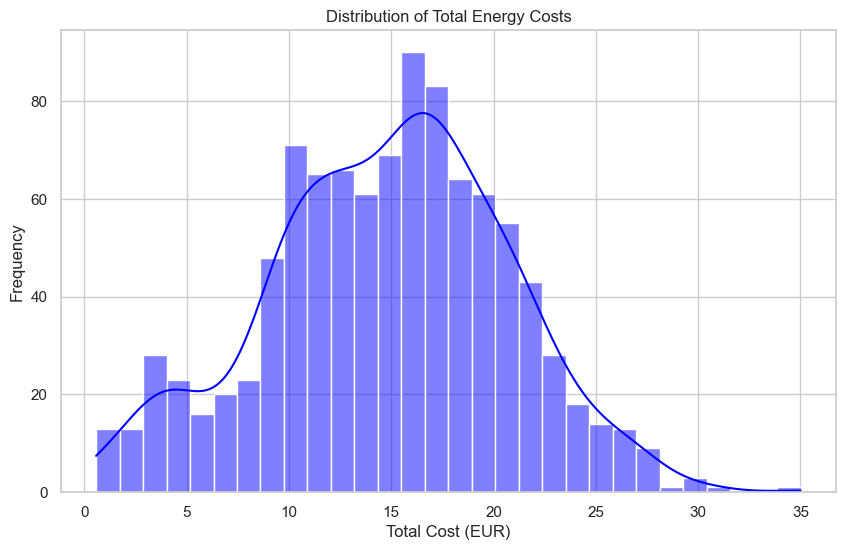

In [58]:
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(hvac_data_tidy['total_cost_eur'], bins=30, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of Total Energy Costs')
plt.xlabel('Total Cost (EUR)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

This plot provides insight into the distribution of energy costs when applying real-world pricing to synthetic energy usage data. The data suggests that most energy costs are moderate, with the potential for both lower and higher costs depending on usage patterns simulated in the synthetic dataset. The smoothness and general shape of the distribution reflect the synthetic nature of the data, which might not capture the full variability seen in purely real-world scenarios.

__Interpretation:__

* Distribution Shape: The histogram shows a roughly bell-shaped distribution of total energy costs, which is indicative of a normal distribution. This suggests that most energy costs fall within a mid-range, with fewer instances of extremely low or high costs.
* Frequency of Costs: The peak of the distribution occurs around 15 EUR, indicating that this is the most common total energy cost within the dataset. This might reflect typical consumption patterns within the synthetic HVAC data when combined with actual energy prices.
* Spread of Costs: The spread of the histogram suggests that while most costs are centered around the mean, there is some variability. This is expected since the synthetic HVAC data, while structured to represent possible real-world scenarios, will show a range of energy usage that reflects different days or conditions simulated in the data.
* KDE Line: The blue line represents the kernel density estimate (KDE), which smooths out the distribution to provide a continuous probability density curve. It helps in visualizing the underlying distribution of the data, confirming that while the distribution is centered around the mean, there are significant tails, indicating the presence of outlier days with unusually high or low energy costs.

__In reality:__

If the HVAC data were real, we would likely see a more complex and irregular distribution of total energy costs. This distribution would better reflect the diverse factors influencing energy consumption and cost in actual building operations, including variability in usage patterns, external conditions, and potential data quality issues. The histogram might show multiple peaks, longer tails, and possibly a skewed shape, highlighting the unpredictability and complexity of real-world energy management.

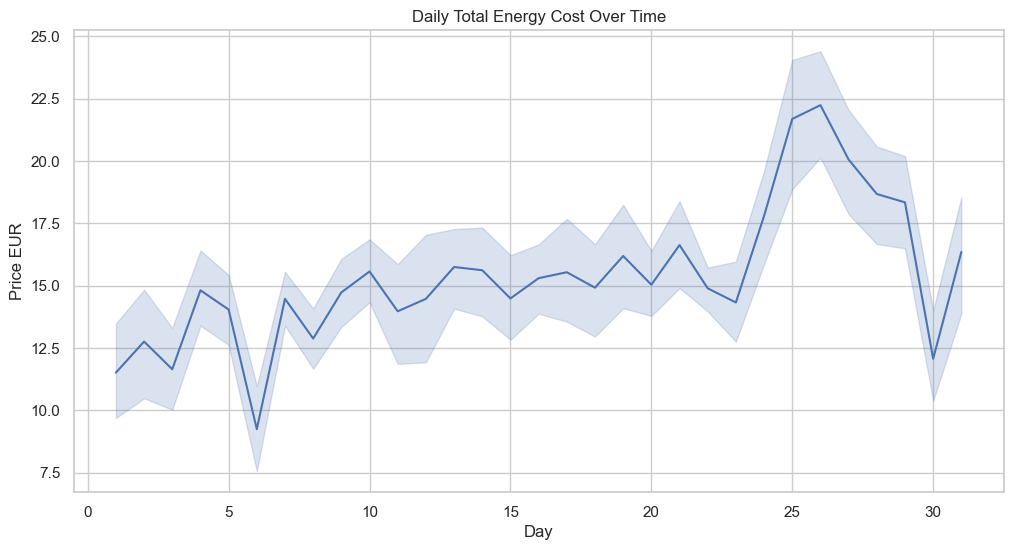

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hvac_data['timestamp'].dt.day, y='total_cost_eur', data=hvac_data_tidy)
plt.title('Daily Total Energy Cost Over Time')
plt.xlabel('Day')
plt.ylabel('Price EUR')
plt.show()

This plot shows the daily total energy cost over a month, with a clear upward trend towards the end of the month. The shaded area around the line represents the variability or uncertainty (typically one standard deviation) in the data at each point.

__Interpretation:__

* End-of-Month Spike: There is a noticeable increase in energy costs towards the end of the month. In a real-world scenario, this could be due to several factors, such as increased operational activities, higher demand for energy, or even billing cycles that capture more consumption data near the end of the month.
* Variability: The shaded area indicates that the daily costs have some variability, which could be due to fluctuations in energy usage or price changes on different days. In a real dataset, this variability might be influenced by external factors like weather, varying occupancy levels, or different operational schedules.


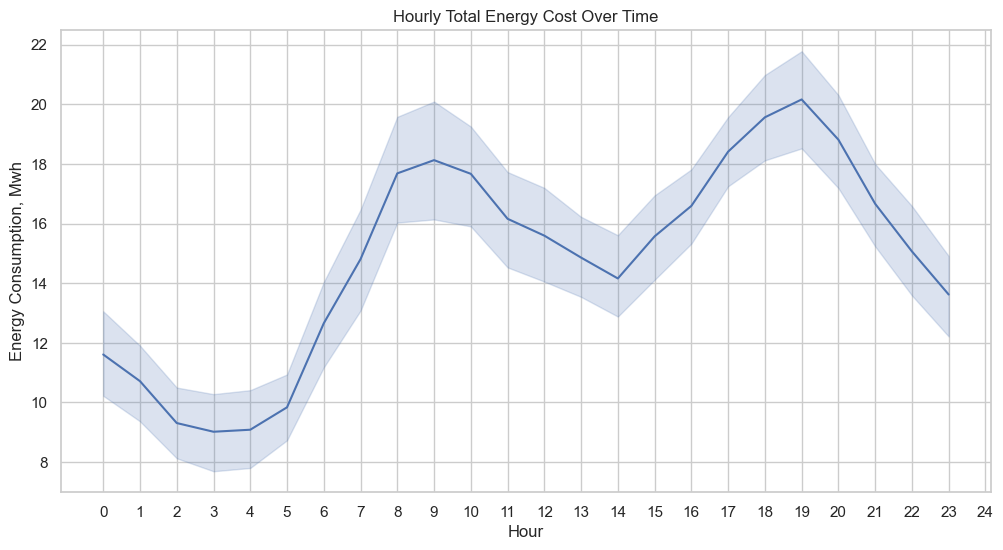

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hvac_data['timestamp'].dt.hour, y='total_cost_eur', data=hvac_data_tidy)

plt.xticks(range(0, 25))
plt.title('Hourly Total Energy Cost Over Time')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption, Mwh')
plt.show()

This plot displays the hourly energy cost over a 24-hour period, showing two main peaks—one in the late morning and another in the early evening. The shaded area again represents the variability in the data.

__Interpretation:__

* Bimodal Pattern: The bimodal shape of the plot suggests that energy costs are higher during two key periods of the day—late morning and early evening. In a real-world scenario, these peaks are likely due to increased energy demand during working hours (late morning) and possibly the evening when buildings are still occupied but require additional lighting, heating, or cooling.
* Midday Dip: The dip around midday could be indicative of a lull in energy-intensive activities, perhaps during lunch hours when some equipment may be turned off or operations slow down.
* Early Morning and Late Night Low: Lower costs during the early morning and late at night are typical, as these are off-peak hours when less energy is consumed.
  
Next, let's calculate the cumulative cost over the entire period by first determining the daily cost.

In [61]:
hvac_data_tidy.columns

Index(['timestamp', 'temperature', 'humidity', 'energy_consumption',
       'renewable_energy', 'renewable_energy_pct', 'square_meters',
       'occupancy', 'hvac_usage', 'lighting_usage', 'day_of_week', 'holiday',
       'price_eur_mwh', 'consumption_mwh', 'total_cost_eur'],
      dtype='object')

In [62]:
hvac_data_tidy['daily_cost_eur'] = hvac_data_tidy['consumption_mwh'] * hvac_data_tidy['total_cost_eur']

I will then calculate the cumulative cost over time.

In [63]:
hvac_data_tidy['cumulative_cost_eur'] = hvac_data_tidy['daily_cost_eur'].cumsum()

Finally, I will plot the cumulative cost over time.

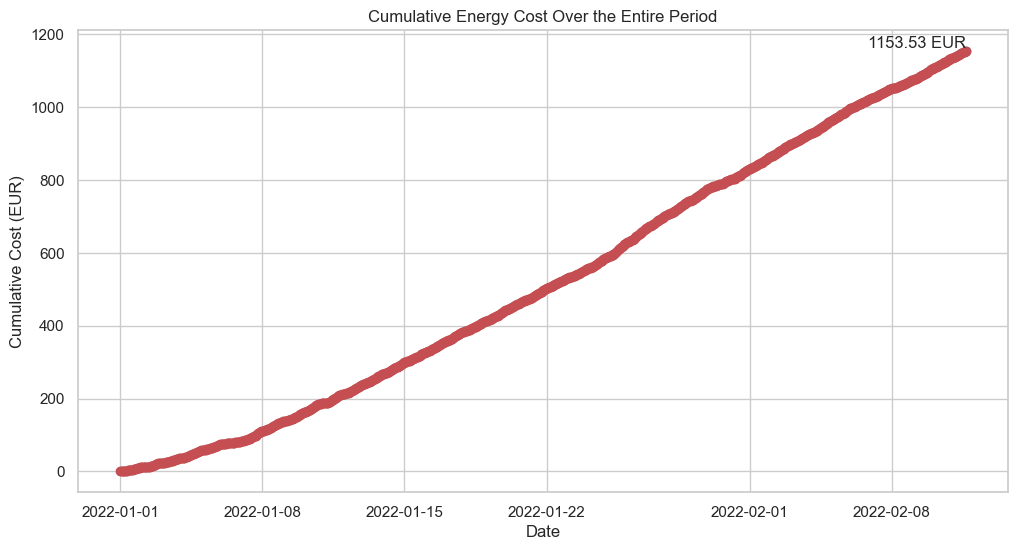

In [64]:
#Find the highest cumulative cost
max_cumulative_cost = hvac_data_tidy['cumulative_cost_eur'].max()
max_cumulative_date = hvac_data_tidy.loc[hvac_data_tidy['cumulative_cost_eur'].idxmax(), 'timestamp']

#Plot the Cumulative Cost Over Time
plt.figure(figsize=(12, 6))
plt.plot(hvac_data_tidy['timestamp'], hvac_data_tidy['cumulative_cost_eur'], marker='o', linestyle='-', color='r')

# Highlight the Highest Point
plt.scatter(max_cumulative_date, max_cumulative_cost, color='b')  # Highlight the point
plt.text(max_cumulative_date, max_cumulative_cost, f'{max_cumulative_cost:.2f} EUR', 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right')


plt.title('Cumulative Energy Cost Over the Entire Period')
plt.xlabel('Date')
plt.ylabel('Cumulative Cost (EUR)')
plt.grid(True)
plt.show()

The visualization of the cumulative energy cost over time reveals that the total energy cost for the entire period amounts to 1153.53 EUR. This cost reflects the energy consumption trends and the associated prices over time, with the cumulative cost steadily increasing as energy is consumed.

Now, let's determine the cost of energy if the share of renewable energy increases to 30% and 50%. In the first scenario, we'll subtract 15% from the current cost since we already have 15% renewable energy, bringing the total to 30%. In the second scenario, we will subtract 35% to achieve a total of 50% renewable energy.

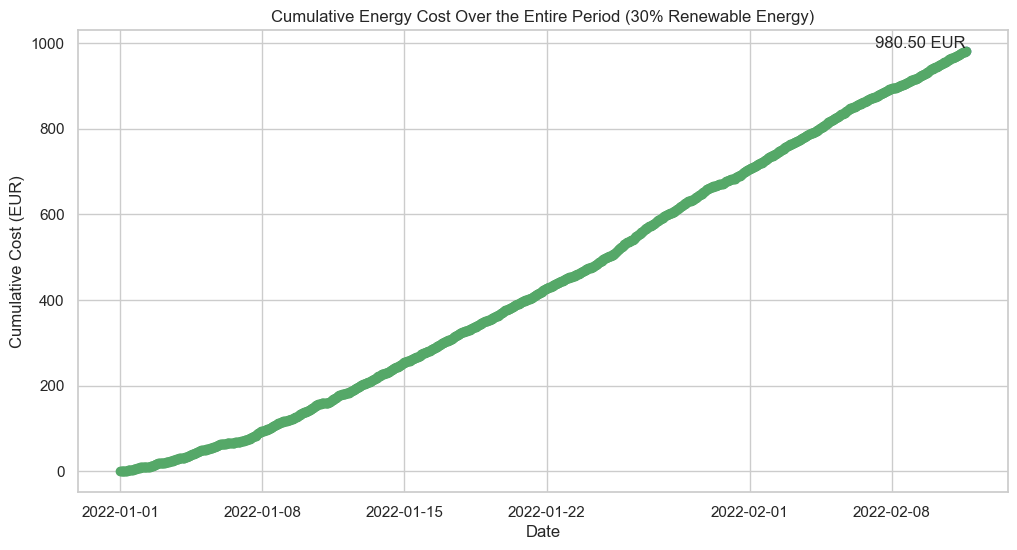

In [65]:
# Adjusting for 30% Renewable Energy
renewable_percentage_15 = 0.15
cumulative_cost_30 = hvac_data_tidy['cumulative_cost_eur'] * (1 - renewable_percentage_15)

# Find the highest cumulative cost for 30% renewable
max_cumulative_cost_30 = cumulative_cost_30.max()
max_cumulative_date_30 = hvac_data_tidy.loc[cumulative_cost_30.idxmax(), 'timestamp']

# Plot for 30% Renewable Energy
plt.figure(figsize=(12, 6))
plt.plot(hvac_data_tidy['timestamp'], cumulative_cost_30, marker='o', linestyle='-', color='g')

# Highlight the Highest Point for 30% Renewable Energy
plt.scatter(max_cumulative_date_30, max_cumulative_cost_30, color='b')
plt.text(max_cumulative_date_30, max_cumulative_cost_30, f'{max_cumulative_cost_30:.2f} EUR', 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right')

plt.title('Cumulative Energy Cost Over the Entire Period (30% Renewable Energy)')
plt.xlabel('Date')
plt.ylabel('Cumulative Cost (EUR)')
plt.grid(True)
plt.show()

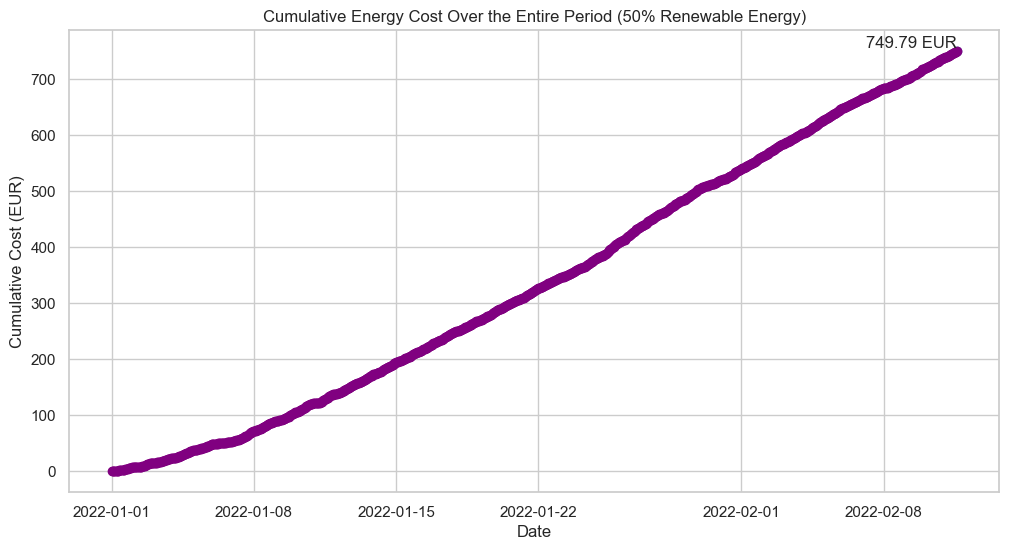

In [66]:
# Adjusting for 50% Renewable Energy
renewable_percentage_35 = 0.35
cumulative_cost_50 = hvac_data_tidy['cumulative_cost_eur'] * (1 - renewable_percentage_35)

# Find the highest cumulative cost for 50% renewable
max_cumulative_cost_50 = cumulative_cost_50.max()
max_cumulative_date_50 = hvac_data_tidy.loc[cumulative_cost_50.idxmax(), 'timestamp']

# Plot for 50% Renewable Energy
plt.figure(figsize=(12, 6))
plt.plot(hvac_data_tidy['timestamp'], cumulative_cost_50, marker='o', linestyle='-', color='purple')

# Highlight the Highest Point for 50% Renewable Energy
plt.scatter(max_cumulative_date_50, max_cumulative_cost_50, color='b')
plt.text(max_cumulative_date_50, max_cumulative_cost_50, f'{max_cumulative_cost_50:.2f} EUR', 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right')

plt.title('Cumulative Energy Cost Over the Entire Period (50% Renewable Energy)')
plt.xlabel('Date')
plt.ylabel('Cumulative Cost (EUR)')
plt.grid(True)
plt.show()

Summary:

First Plot: Shows cumulative energy costs when 30% of energy is from renewable sources.

Second Plot: Shows cumulative energy costs when 50% of energy is from renewable sources.

## Conclusion

### Simulated Data Insights and Real-World Application

The analyses performed on this simulated dataset have provided valuable insights into energy consumption patterns and the impact of various factors such as temperature, lighting usage, and renewable energy adoption. While the simulated data offers a controlled environment to explore these relationships, real-world data often presents additional complexity and variability.

__Key Takeaways:__

* Optimization Opportunities: In real-world applications, understanding these patterns can guide targeted interventions to reduce energy consumption. For example, optimizing temperature setpoints, increasing renewable energy usage, and implementing energy-efficient lighting can all contribute to significant cost savings and environmental benefits.
* Data-Driven Decision Making: Accurate data collection and analysis in real-world settings are crucial for making informed decisions. Leveraging real-time data and advanced analytics can further enhance energy management strategies.
By comparing these simulated results with real-world expectations, we can better appreciate the challenges and opportunities in managing energy consumption in buildings, ultimately driving towards more sustainable and cost-effective operations.

### Cost Analysis

It is important to note that only 15% of the energy utilized during this period came from renewable sources. Given the growing emphasis on sustainability and cost efficiency, there is a significant opportunity to reduce this total cost by increasing the share of renewable energy in the overall energy mix.

Renewable energy sources often come with lower operational costs, and by leveraging more of these sources, it is possible to decrease the dependency on traditional, more expensive energy sources. Not only would this shift contribute to cost savings, but it would also align with broader environmental goals, reducing carbon footprints and promoting a more sustainable energy future.

In summary, while the total cost for the period stands at 1153.53 EUR, this figure could be lowered substantially by increasing the utilization of renewable energy sources beyond the current 15%.

## References

### Datasets

[Energy-consumption-prediction](https://www.kaggle.com/datasets/mrsimple07/energy-consumption-prediction)

[European wholesale electricity price data](https://ember-climate.org/data-catalogue/european-wholesale-electricity-price-data/)

### Articles

[Types of Pandas Joins and How to use them in Python](https://www.stratascratch.com/blog/types-of-pandas-joins-and-how-to-use-them-in-python/)

[Machine Learning Modelling for HVAC Systems](https://www.theseus.fi/bitstream/handle/10024/501345/Machine%20Learning%20Modelling%20for%20HVAC%20Systems.pdf?sequence=2)
